<a href="https://colab.research.google.com/github/michaelfidanza/heart_disease_forecasting/blob/colab/heart_disease_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart disease analysis

In [129]:
# import libraries and functions
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# connect to gdrive account to retrieve the csv file
drive.mount('/content/gdrive')
heart_disease_df = pd.read_csv('gdrive/MyDrive/data_sets/heart_2020_cleaned.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Normalizing column names

In [139]:
heart_disease_df.columns = heart_disease_df.columns.map(lambda x : x.lower())
heart_disease_df.columns

Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')

## Initial exploration

As we can see there aren't NULL values, probably already cleaned. Anyway there are a lot of features which are not represented as numbers

In [132]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   heartdisease      319795 non-null  object 
 1   bmi               319795 non-null  float64
 2   smoking           319795 non-null  object 
 3   alcoholdrinking   319795 non-null  object 
 4   stroke            319795 non-null  object 
 5   physicalhealth    319795 non-null  float64
 6   mentalhealth      319795 non-null  float64
 7   diffwalking       319795 non-null  object 
 8   sex               319795 non-null  object 
 9   agecategory       319795 non-null  object 
 10  race              319795 non-null  object 
 11  diabetic          319795 non-null  object 
 12  physicalactivity  319795 non-null  object 
 13  genhealth         319795 non-null  object 
 14  sleeptime         319795 non-null  float64
 15  asthma            319795 non-null  object 
 16  kidneydisease     31

We can notice that there are some outliers and some strange values that we could investigate later (e.g. sleeptime = 1 or = 24)

In [124]:
# heart_disease_df.describe(include='all').T
heart_disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
physicalhealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
mentalhealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
sleeptime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


### Let's see the unique values of the features which are not numbers

In [133]:
# apply a mask to retrieve all non numeric columns
columns_to_encode_list = heart_disease_df.dtypes[(heart_disease_df.dtypes != 'float64')].index.tolist()
columns_to_encode_list

['heartdisease',
 'smoking',
 'alcoholdrinking',
 'stroke',
 'diffwalking',
 'sex',
 'agecategory',
 'race',
 'diabetic',
 'physicalactivity',
 'genhealth',
 'asthma',
 'kidneydisease',
 'skincancer']

In [143]:
# check the unique values for the features
# most of them are of the type "Yes" or "No"
for col in columns_to_encode_list:
  print(col, '(',len(heart_disease_df[col].unique()) , '):\n',heart_disease_df[col].unique(),'\n')

heartdisease ( 2 ):
 ['No' 'Yes'] 

smoking ( 2 ):
 ['Yes' 'No'] 

alcoholdrinking ( 2 ):
 ['No' 'Yes'] 

stroke ( 2 ):
 ['No' 'Yes'] 

diffwalking ( 2 ):
 ['No' 'Yes'] 

sex ( 2 ):
 ['Female' 'Male'] 

agecategory ( 13 ):
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

race ( 6 ):
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

diabetic ( 4 ):
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

physicalactivity ( 2 ):
 ['Yes' 'No'] 

genhealth ( 5 ):
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

asthma ( 2 ):
 ['Yes' 'No'] 

kidneydisease ( 2 ):
 ['No' 'Yes'] 

skincancer ( 2 ):
 ['Yes' 'No'] 



### Encode categorical values with numbers

In [141]:
# we use a function from sklearn to encode automatically the columns
# we could have mapped to a dictionary every single columns
# e.g. 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

heart_disease_df_encoded = heart_disease_df.copy()

for col in columns_to_encode_list:
  heart_disease_df_encoded[col] = le.fit_transform(heart_disease_df_encoded[col])

In [142]:
# check new values for the columns
for col in columns_to_encode_list:
  print(col, '(',len(heart_disease_df_encoded[col].unique()) , '):\n',heart_disease_df_encoded[col].unique(),'\n')

heartdisease ( 2 ):
 [0 1] 

smoking ( 2 ):
 [1 0] 

alcoholdrinking ( 2 ):
 [0 1] 

stroke ( 2 ):
 [0 1] 

diffwalking ( 2 ):
 [0 1] 

sex ( 2 ):
 [0 1] 

agecategory ( 13 ):
 [ 7 12  9 11  4 10  8  6  5  0  3  2  1] 

race ( 6 ):
 [5 2 1 0 4 3] 

diabetic ( 4 ):
 [2 0 1 3] 

physicalactivity ( 2 ):
 [1 0] 

genhealth ( 5 ):
 [4 1 2 3 0] 

asthma ( 2 ):
 [1 0] 

kidneydisease ( 2 ):
 [0 1] 

skincancer ( 2 ):
 [1 0] 



### Try to get some insights about data

There is no strong correlation between single variables.
We can see that heart disease has the strongest positive correlation with alcoholdrinking, physicalhealth, diffwalking, agecategory, diabetic and kidneydisease, but in any case they're weak correlation ~ 20 %

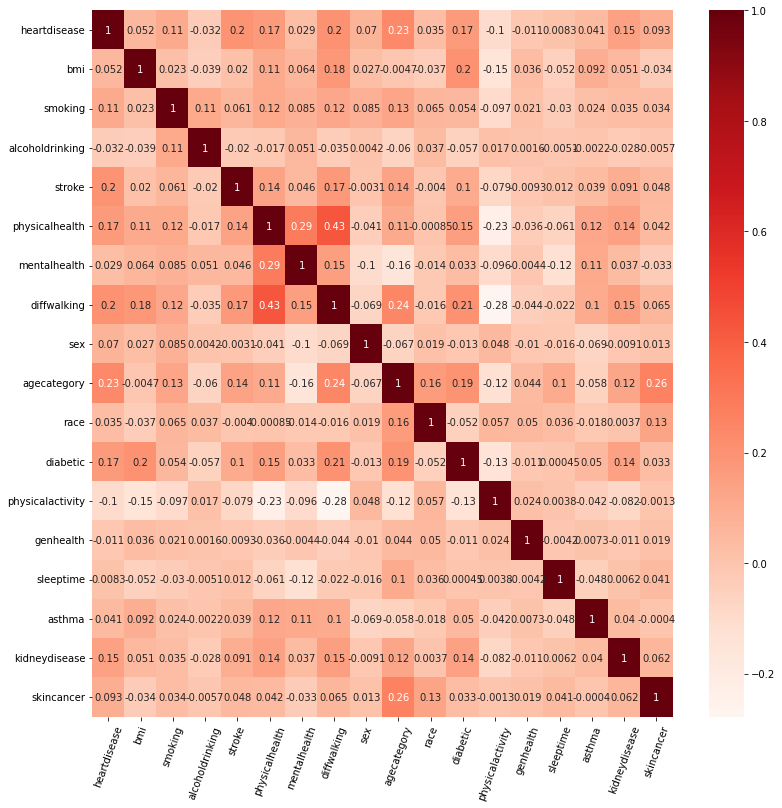

In [116]:
plt.figure(figsize=(13,13))
sns.heatmap(heart_disease_df.corr(), annot=True, cmap='Reds')
plt.xticks(rotation=70)
plt.show()

By looking at the proportions between people who had/have heart disease and those who don't, we notice that the dataset is unbalanced, and this will be a problem later when applying ML algorithms

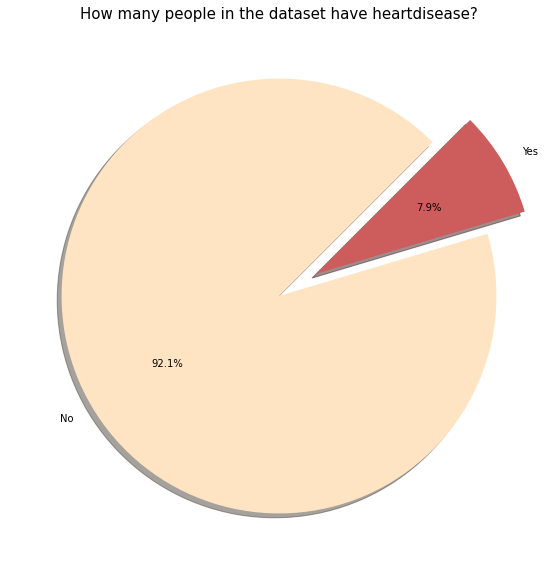

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    [len(heart_disease_df_encoded['heartdisease'] - sum(heart_disease_df_encoded['heartdisease'])),
     sum(heart_disease_df_encoded['heartdisease'])]
    ,labels=("No", "Yes")
    ,explode=(0, 0.2)
    ,startangle=45
    ,autopct='%1.1f%%'
    ,shadow=True
    ,colors=['bisque', 'indianred']
    )
plt.title("How many people in the dataset have heartdisease?", fontsize=15)
plt.show()

Let's see graphically if some variables might affect BMI

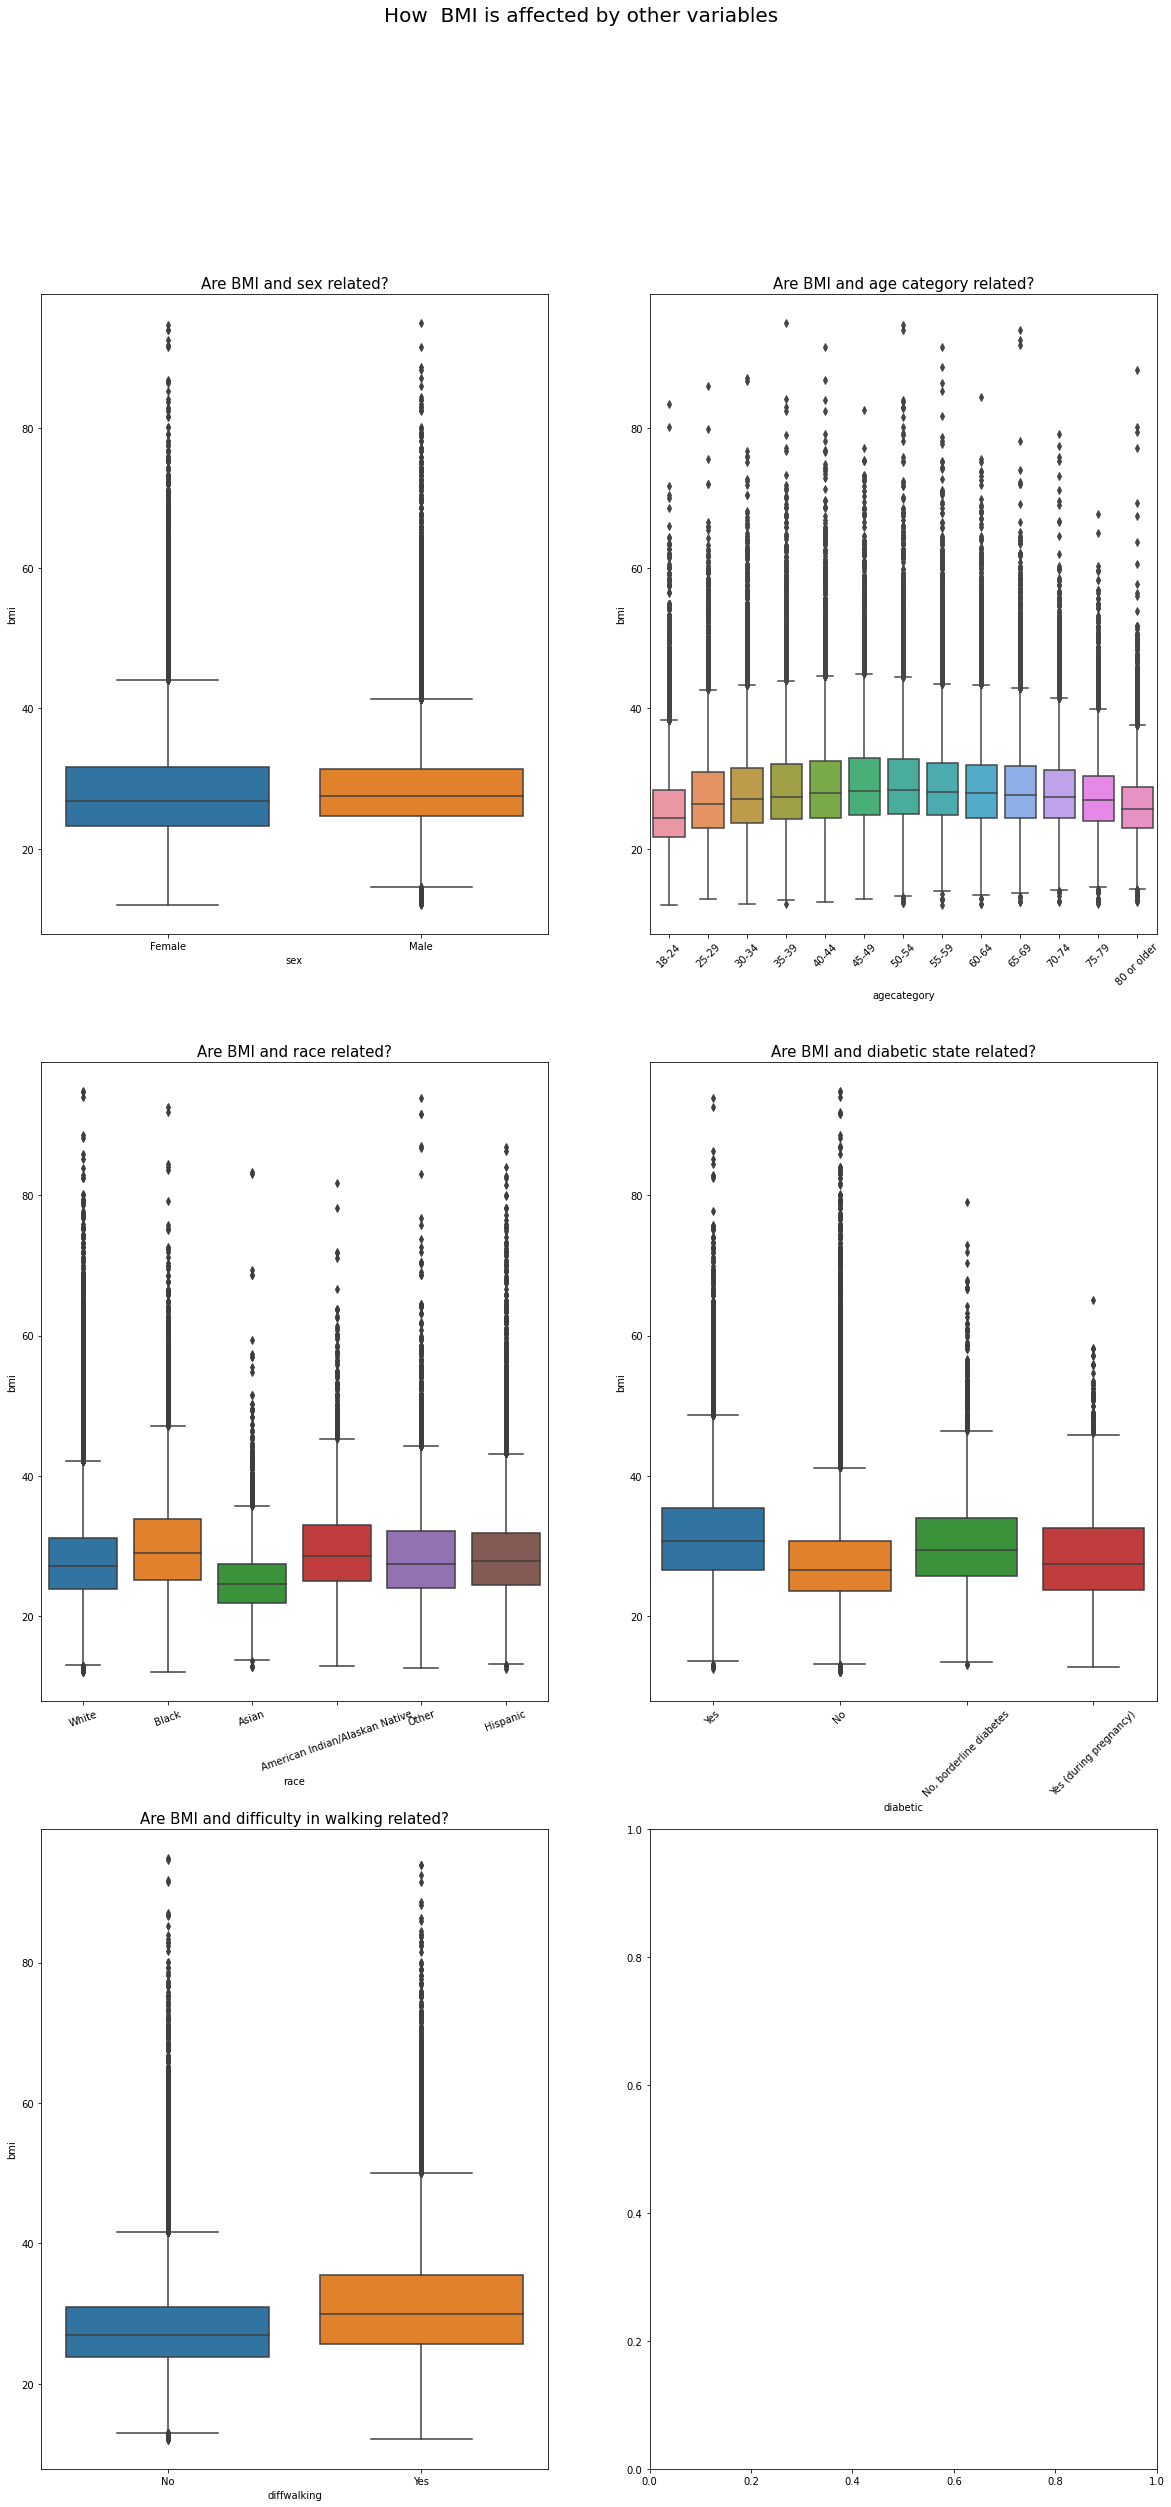

In [181]:
fig, ax = plt.subplots(3, 2, figsize=(20, 40))

# order a copy of the dataframe to have a better graph
heart_disease_df_sorted = heart_disease_df.sort_values(by='agecategory')

sns.boxplot(
    x = 'sex'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[0,0]
)

sns.boxplot(
    x = 'agecategory'
    ,y = 'bmi'
    ,data = heart_disease_df_sorted
    ,ax=ax[0,1]
)



sns.boxplot(
    x = 'race'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[1,0]
)


sns.boxplot(
    x = 'diabetic'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[1,1]
)

sns.boxplot(
    x = 'diffwalking'
    ,y = 'bmi'
    ,data = heart_disease_df
    ,ax=ax[2,0]
)
ax[0,1].tick_params(axis='x', rotation=45)
ax[1,0].tick_params(axis='x', rotation=20)
ax[1,1].tick_params(axis='x', rotation=45)
ax[0,0].set_title('Are BMI and sex related?', fontsize=15)
ax[0,1].set_title('Are BMI and age category related?', fontsize=15)
ax[1,0].set_title('Are BMI and race related?', fontsize=15)
ax[1,1].set_title('Are BMI and diabetic state related?', fontsize=15)
ax[2,0].set_title('Are BMI and difficulty in walking related?', fontsize=15)
fig.suptitle('How  BMI is affected by other variables', fontsize=20)
plt.show()